In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet

In [27]:


# Use the detected encoding
Rtl_data = pd.read_csv("C://Users//krishnakant//OneDrive//Desktop//coding//cseg//Data.csv", encoding = 'unicode_escape')
Rtl_data.head()


,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [30]:
Rtl_data.shape

(541909, 8)

In [39]:
#customer distribution by country

country_cust_data = Rtl_data[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
0,United Kingdom,3950


In [40]:
#keeping only united kingdom data
Rtl_data= Rtl_data.query("Country =='United Kingdom'").reset_index(drop=True)

In [41]:
# check for missing values in the dataset

Rtl_data.isnull().sum(axis=0)

ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      133600
Country              0
dtype: int64

In [42]:
Rtl_data=Rtl_data[pd.notnull(Rtl_data['CustomerID'])]
# remove missing values that are null

Rtl_data.Quantity.min()
# tells if there is negative values in quantity


-80995

In [43]:
Rtl_data.UnitPrice.min()
#check negative unit price coloumn

0.0

In [44]:
Rtl_data=Rtl_data[(Rtl_data['Quantity']>0)]

In [45]:
Rtl_data['InvoiceDate']= pd.to_datetime(Rtl_data['InvoiceDate'])

In [46]:
Rtl_data['TotalAmount']= Rtl_data['Quantity']*Rtl_data['UnitPrice']

In [47]:
Rtl_data.shape

(354345, 9)

In [48]:
Rtl_data.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [98]:
import datetime as dt


Latest_Date= dt.datetime(2011,12,10)


RFMScores=Rtl_data.groupby('CustomerID').agg({'InvoiceDate': lambda x : (Latest_Date-x.max()),'ï»¿InvoiceNo': lambda x:len(x), 'TotalAmount': lambda x: x.sum()})
#RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype('int64')
#RFMScores['InvoiceDate'] = []

RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].dt.days.astype(int)




RFMScores.rename(columns={
    'InvoiceDate': 'Recency',
    'ï»¿InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)


RFMScores.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,22,103,4196.01
2,12748.0,4,4596,33719.73
3,12749.0,22,199,4090.88
4,12820.0,44,59,942.34


In [99]:
RFMScores.Recency.describe()

count    3921.000000
mean      104.586585
std       115.044919
min        -1.000000
25%        21.000000
50%        60.000000
75%       161.000000
max       696.000000
Name: Recency, dtype: float64

C:\Users\krishnakant\AppData\Local\Temp\ipykernel_22324\2120756835.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x)


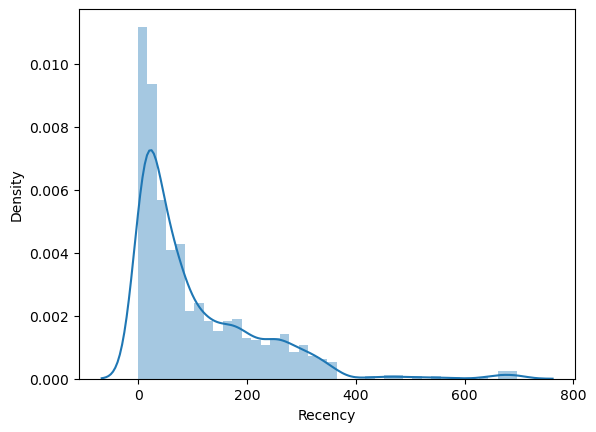

In [100]:
import seaborn as sns

x= RFMScores['Recency']

ax=sns.distplot(x)

In [101]:
#split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,21.0,17.0,300.04
0.50,60.0,41.0,651.82
0.75,161.0,99.0,1575.89


In [102]:
def RScoring(x,p,d):
#low r scoring will results to good customer
    if x<= d[p][0.25]:
        return 1
    
    elif x<=d[p][0.50]:
        return 2
    
    elif x<=d[p][0.75]:
        return 3
    
    else:
        return 4
def FnmScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3    
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [103]:

RFMScores['R']= RFMScores['Recency'].apply(RScoring,args=('Recency',quantiles,))
RFMScores['F']= RFMScores['Frequency'].apply(FnmScoring,args=('Frequency',quantiles,))
RFMScores['M']= RFMScores['Monetary'].apply(FnmScoring,args=('Monetary',quantiles,))

RFMScores.head()


,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,22,103,4196.01,2,1,1
12748.0,4,4596,33719.73,1,1,1
12749.0,22,199,4090.88,2,1,1
12820.0,44,59,942.34,2,2,2


In [117]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

RFMScores['RFMScore']=RFMScores[['R','F','M']].sum(axis=1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RfmGroup,RfmScores,RfmScore,RFM_Loyalty_Level,RFMGroup,RFMScore
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,9,Silver,441,9
12747.0,22,103,4196.01,2,1,1,211,4,4,Platinum,211,4
12748.0,4,4596,33719.73,1,1,1,111,3,3,Platinum,111,3
12749.0,22,199,4090.88,2,1,1,211,4,4,Platinum,211,4
12820.0,44,59,942.34,2,2,2,222,6,6,Gold,222,6


In [118]:
Loyalty_level =['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut( RFMScores.RfmScore, q = 4 , labels= Loyalty_level)
RFMScores['RFM_Loyalty_Level'] =Score_cuts.values
RFMScores.reset_index().head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RfmGroup,RfmScores,RfmScore,RFM_Loyalty_Level,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,4,4,1,441,9,9,Silver,441,9
1,12747.0,22,103,4196.01,2,1,1,211,4,4,Platinum,211,4
2,12748.0,4,4596,33719.73,1,1,1,111,3,3,Platinum,111,3
3,12749.0,22,199,4090.88,2,1,1,211,4,4,Platinum,211,4
4,12820.0,44,59,942.34,2,2,2,222,6,6,Gold,222,6


In [119]:
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary',ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RfmGroup,RfmScores,RfmScore,RFM_Loyalty_Level,RFMGroup,RFMScore
0,18102.0,11,431,259657.30,1,1,1,111,3,3,Platinum,111,3
1,17450.0,2,337,194550.79,1,1,1,111,3,3,Platinum,111,3
2,17511.0,5,963,91062.38,1,1,1,111,3,3,Platinum,111,3
3,16684.0,11,277,66653.56,1,1,1,111,3,3,Platinum,111,3
4,14096.0,11,5111,65164.79,1,1,1,111,3,3,Platinum,111,3
5,15311.0,-1,2379,60767.90,1,1,1,111,3,3,Platinum,111,3
6,13089.0,5,1818,58825.83,1,1,1,111,3,3,Platinum,111,3
7,15061.0,4,403,54534.14,1,1,1,111,3,3,Platinum,111,3
8,14088.0,10,589,50491.81,1,1,1,111,3,3,Platinum,111,3
9,17841.0,-1,7847,40991.57,1,1,1,111,3,3,Platinum,111,3


In [121]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)




In [123]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

C:\Users\krishnakant\AppData\Local\Temp\ipykernel_22324\3592897759.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




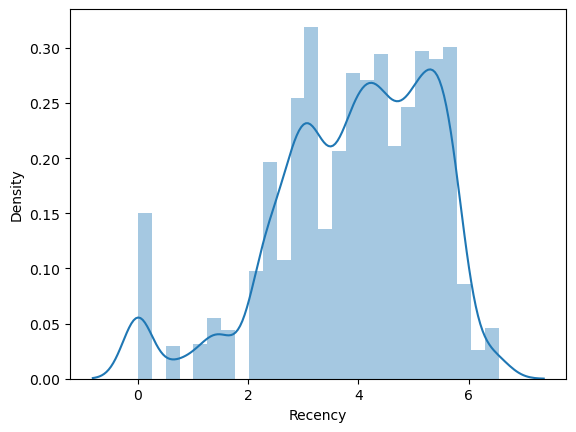

In [125]:
Recency_plot=Log_Tfd_Data['Recency']

ax=sns.distplot(Recency_plot)

C:\Users\krishnakant\AppData\Local\Temp\ipykernel_22324\1949199293.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




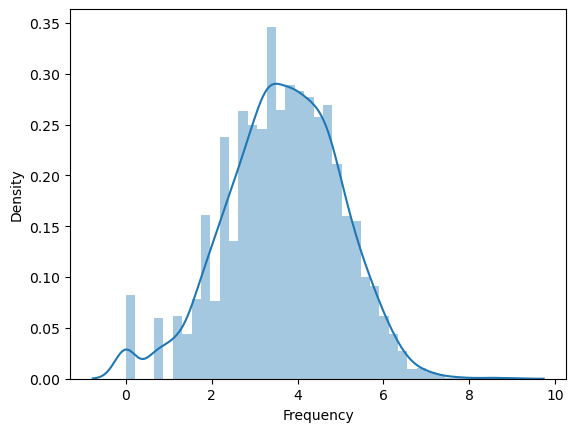

In [127]:
Frequency_plot=Log_Tfd_Data.query('Frequency<1000')['Frequency']

ax=sns.distplot(Frequency_plot)

C:\Users\krishnakant\AppData\Local\Temp\ipykernel_22324\2635957066.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




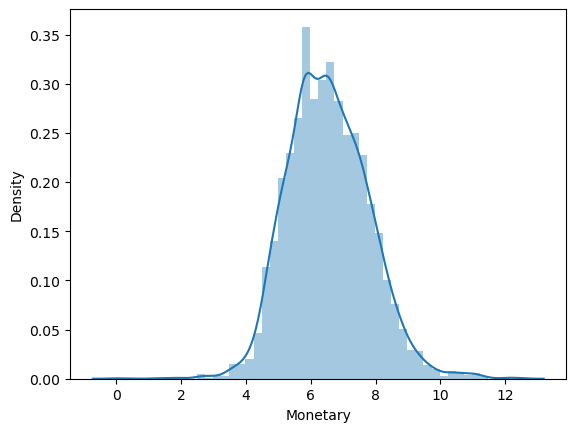

In [128]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)


In [129]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)


c:\Users\krishnakant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\krishnakant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\krishnakant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\krishnakant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\krishnakant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: Future

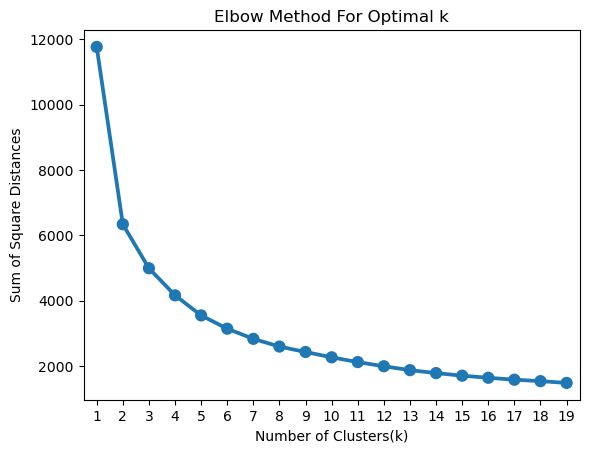

In [131]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [133]:
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()


c:\Users\krishnakant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Recency,Frequency,Monetary,R,F,M,RfmGroup,RfmScores,RfmScore,RFM_Loyalty_Level,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,9,Silver,441,9,0
12747.0,22,103,4196.01,2,1,1,211,4,4,Platinum,211,4,1
12748.0,4,4596,33719.73,1,1,1,111,3,3,Platinum,111,3,1
12749.0,22,199,4090.88,2,1,1,211,4,4,Platinum,211,4,1
12820.0,44,59,942.34,2,2,2,222,6,6,Gold,222,6,0


<Figure size 700x700 with 0 Axes>

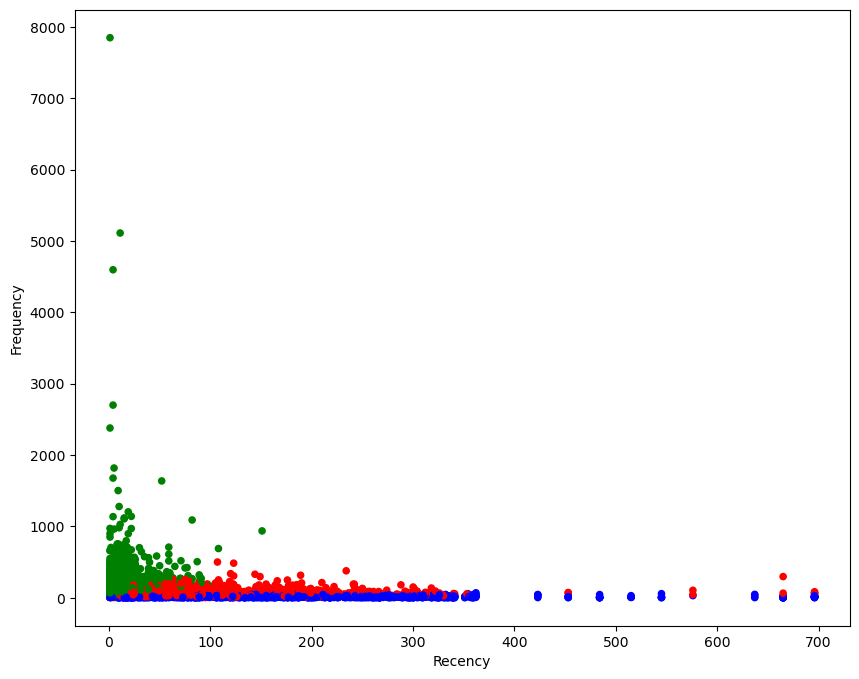

In [134]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)


In [135]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RfmGroup,RfmScores,RfmScore,RFM_Loyalty_Level,RFMGroup,RFMScore,Cluster,Color
CustomerID,,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,9,Silver,441,9,0,red
12747.0,22,103,4196.01,2,1,1,211,4,4,Platinum,211,4,1,green
12748.0,4,4596,33719.73,1,1,1,111,3,3,Platinum,111,3,1,green
12749.0,22,199,4090.88,2,1,1,211,4,4,Platinum,211,4,1,green
12820.0,44,59,942.34,2,2,2,222,6,6,Gold,222,6,0,red
